In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum()
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [4]:
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [13]:
# Ensure necessary columns exist and drop rows with NaN values in critical columns
relevant_columns = ['Amount', 'Date']
df = df.dropna(subset=relevant_columns)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
print(f"Dataset after cleaning: {df.shape[0]} rows")

Dataset after cleaning: 121176 rows


In [15]:
# Extract Date Information
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [16]:
# Aggregate monthly sales to identify seasonal trends
monthly_sales = df.groupby(['Year', 'Month_Name', 'Month'])['Amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month']) 
average_monthly_sales = monthly_sales.groupby('Month_Name')['Amount'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
print("\nAverage Monthly Sales Across Years:")
print(average_monthly_sales)


Average Monthly Sales Across Years:
Month_Name
January              NaN
February             NaN
March          101683.85
April        28836200.27
May          26226476.75
June         23425809.38
July                 NaN
August               NaN
September            NaN
October              NaN
November             NaN
December             NaN
Name: Amount, dtype: float64


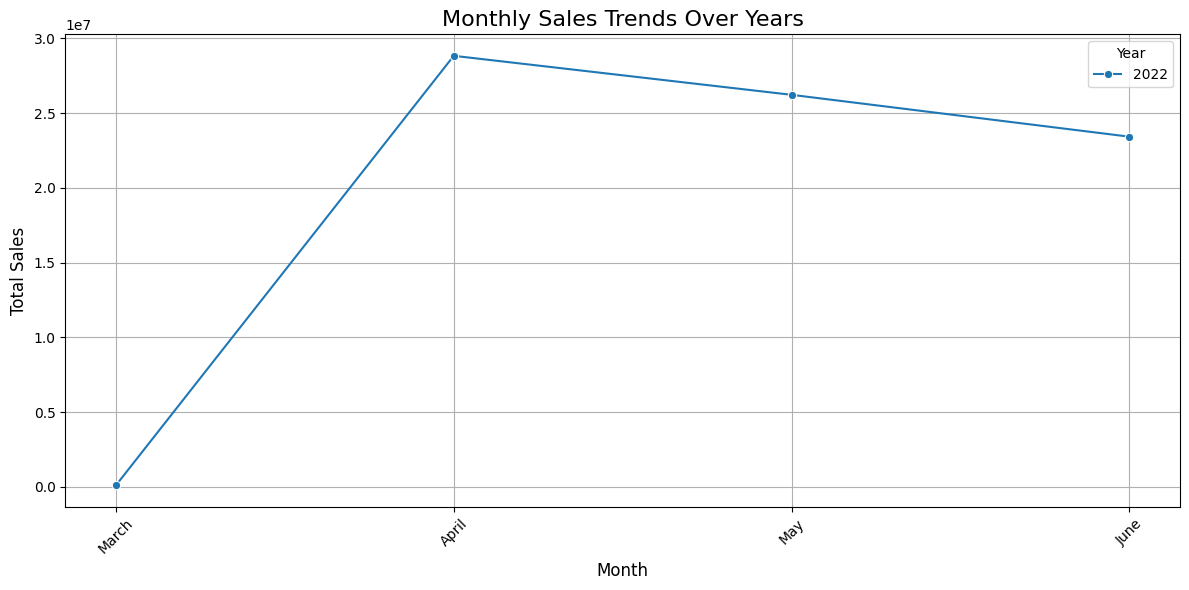

In [17]:
#  Line Graph: Monthly Sales Trends Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Amount', hue='Year', marker='o', palette='tab10')
plt.title("Monthly Sales Trends Over Years", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

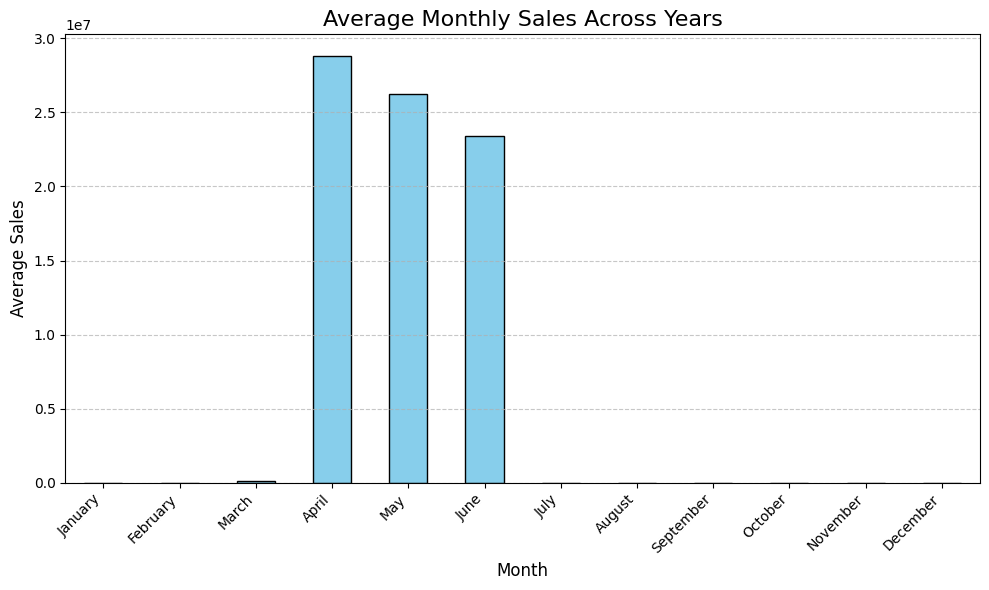

In [9]:
# Bar Graph  Average Monthly Sales Across Years
plt.figure(figsize=(10, 6))
average_monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Sales Across Years", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

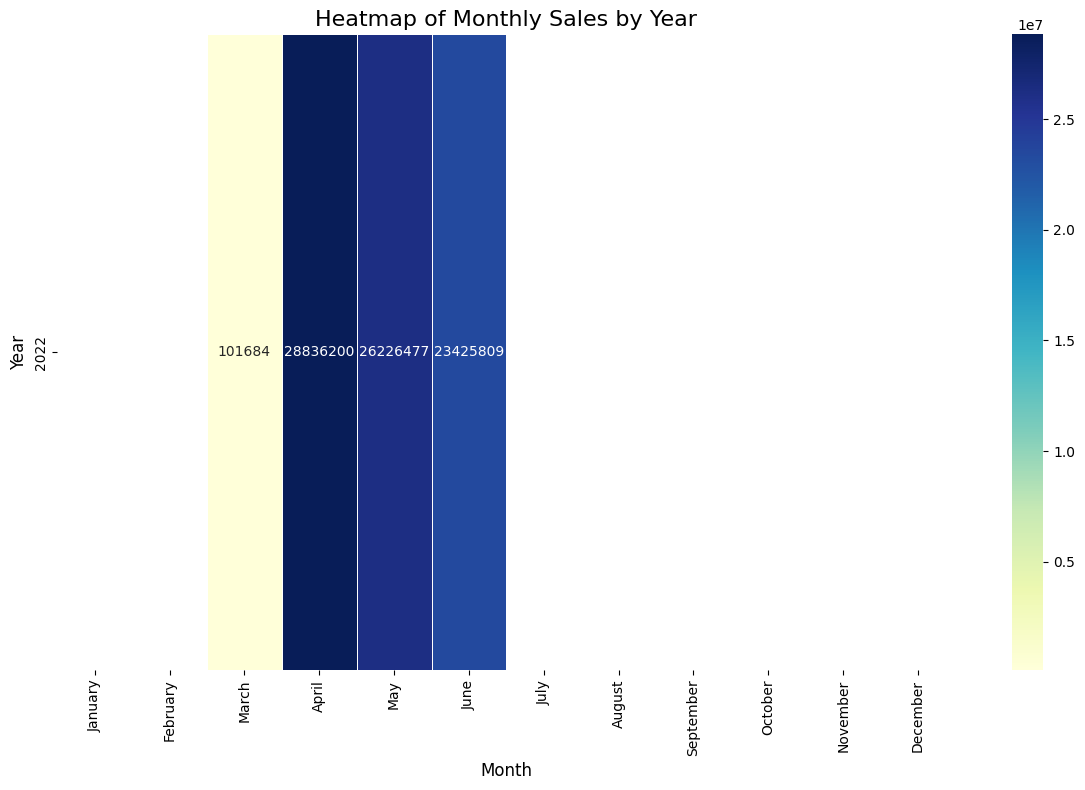

In [ ]:
# Heatmap: Monthly Sales by Year
monthly_pivot = monthly_sales.pivot(index='Year', columns='Month_Name', values='Amount').reindex(
    columns=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Monthly Sales by Year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3784\1389798127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=monthly_sales, x='Month_Name', y='Amount', palette='Set3')


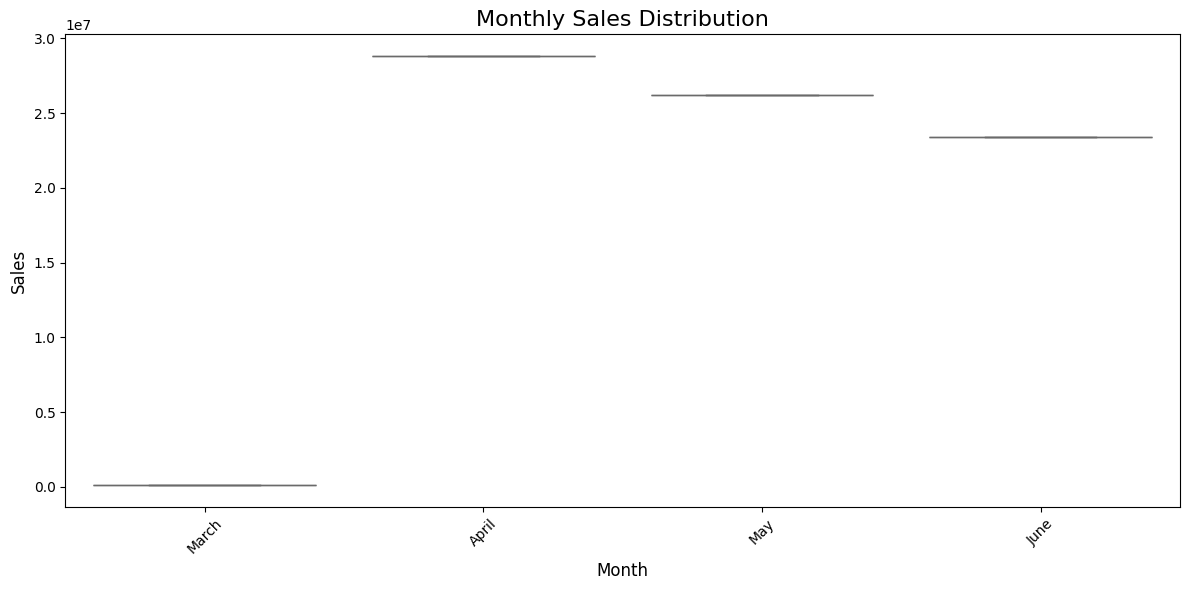

In [18]:
# Box Plot: Monthly Sales Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_sales, x='Month_Name', y='Amount', palette='Set3')
plt.title("Monthly Sales Distribution", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
print("\nInsights:")
print("- Identify peak sales months and slower periods.")
print("- Highlight periods requiring increased inventory for better stock planning.")


Insights:
- Identify peak sales months and slower periods.
- Highlight periods requiring increased inventory for better stock planning.
